In [83]:
import pandas as pd
import numpy as np


# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [84]:
df.to_csv('module_5_auto.csv')

In [85]:
df = df._get_numeric_data() #only use numeric data
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [86]:
%%capture
! pip install ipywidgets #library for plotting

In [87]:
from IPython.display import display
from IPython.html import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [88]:
#Function for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [89]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [90]:
#Part : Training and testing
y_data = df['price']

In [91]:
#drop price data in x data
x_data = df.drop('price', axis=1)

In [92]:
# train_test_split: randomly split data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1, random_state=1)
print("number of test sample :", x_test.shape[0])
print("number of training sample :", x_train.shape[0])

number of test sample : 21
number of training sample : 180


In [93]:
#Question 1
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print(x_test_1.shape[0], x_train_1.shape[0], y_test_1.shape[0], y_train_1.shape[0])

81 120 81 120


In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lre = LinearRegression() #create a linear object

In [96]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [98]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

In [99]:
#R^2 is much smaller using testing data

In [100]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
# test_size = 0.1 means using 90% of the data of training data
lm = LinearRegression()
lm.fit(x_train_2[['horsepower']], y_train_2)
lm.score(x_test_2[['horsepower']], y_test_2)

0.7340722810055448

In [101]:
lm.score(x_train_2[['horsepower']], y_train_2)

0.6479796296498318

In [102]:
#Cross-validation Score
from sklearn.model_selection import cross_val_score

In [103]:
#parameter'cv' determines the number of folds
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [104]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation")

The mean of the folds are 0.522009915042119 and the standard deviation


In [105]:
#use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring = 'neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

In [106]:
#Question 3
Rcross_1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross_1.mean()

0.5166761697127429

In [107]:
#Use cross_val_predict to predict the output, split up data into specified numbers of fold
#one fold to get prediction, the rest folds used for test data
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [108]:
#Part2: Overfitting, underfitting and model selection
#Create MLR
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight','engine-size','highway-mpg']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
#Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight','engine-size','highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [110]:
#Prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

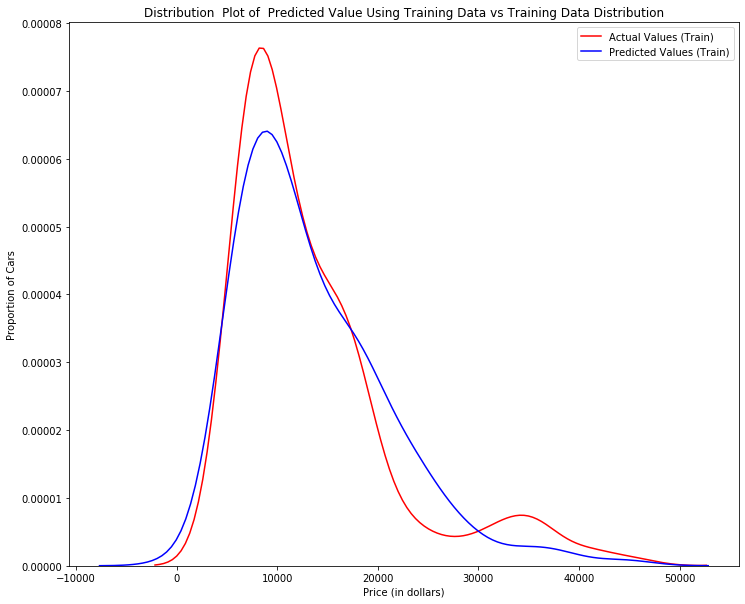

In [112]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

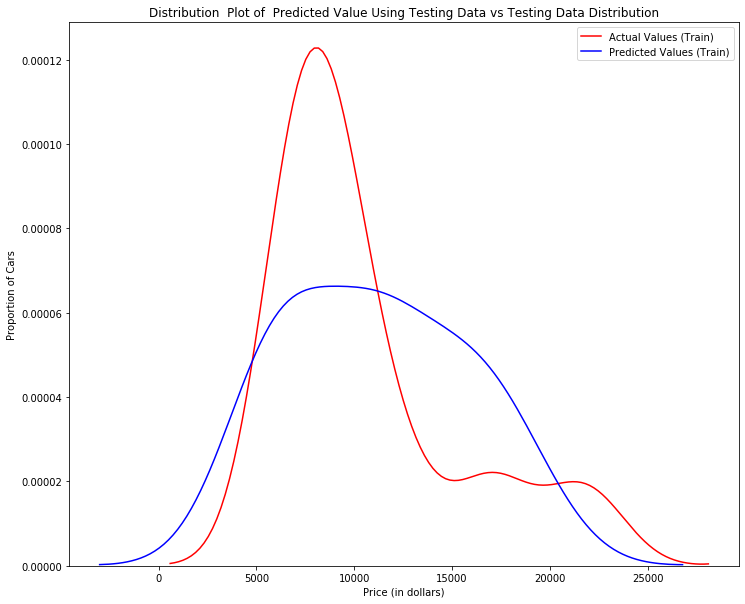

In [113]:
Title = 'Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [114]:
from sklearn.preprocessing import PolynomialFeatures

In [115]:
#Overfitting: occurs when the model fits the noise
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
#perform degree 5 polynomial transformation on horsepower
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [116]:
#create a linear regression and train it
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
yhat = poly.predict(x_train_pr)
yhat[0:5]

array([13157.96121201, 21890.46567997,  6409.70386673, 21231.41969269,
        7905.51950298])

In [118]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [13157.96121201 21890.46567997  6409.70386673 21231.41969269]
True values: [ 6295. 10698. 13860. 13499.]


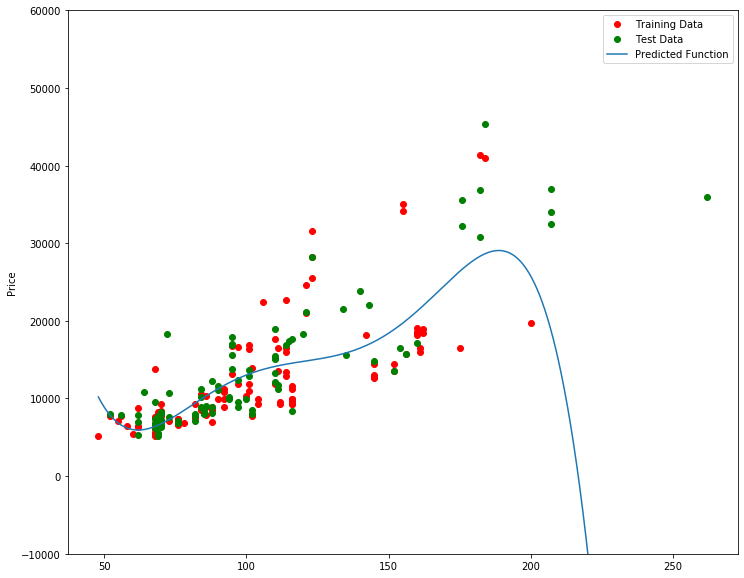

In [119]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [120]:
poly.score(x_train_pr, y_train)

0.5567716899817778

In [121]:
poly.score(x_test_pr, y_test)

-29.871838229908324

In [122]:
#See how R^2 change on the test data for different order polynominal and plot

Text(3, 0.75, 'Maximum R^2 ')

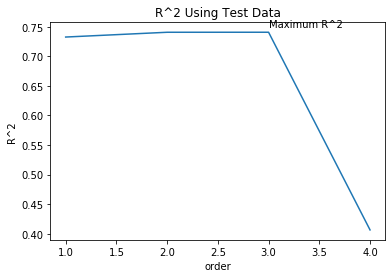

In [123]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n) 
    x_train_pr = pr.fit_transform(x_train[['horsepower']]) 
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In [124]:
#Function using below cell
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

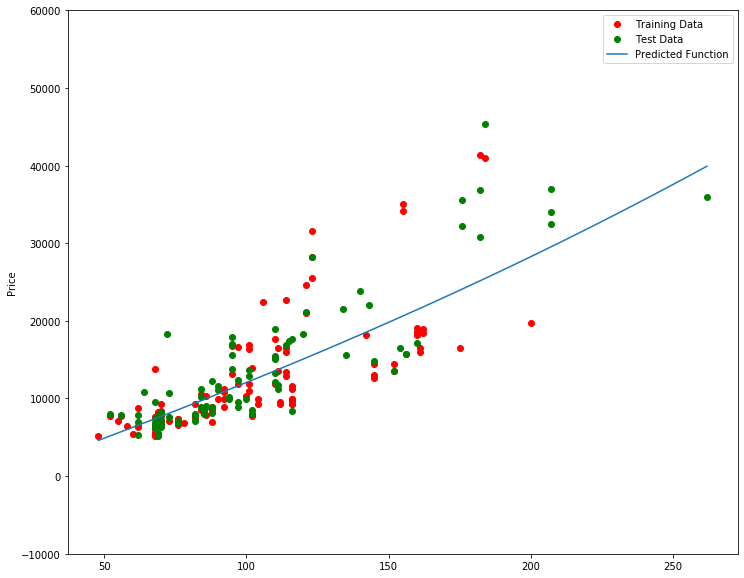

<function __main__.f(order, test_data)>

In [125]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [126]:
#Question 4
pr1 = PolynomialFeatures(degree = 2)

In [127]:
x_train_pr1 = pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']]) 
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']]) 

In [128]:
x_train_pr1.shape #15features

(110, 15)

In [129]:
x_test_pr1.shape

(91, 15)

In [134]:
#Question 4d: linear regression model and train object using method fit
poly1 = LinearRegression().fit(x_train_pr1, y_train)

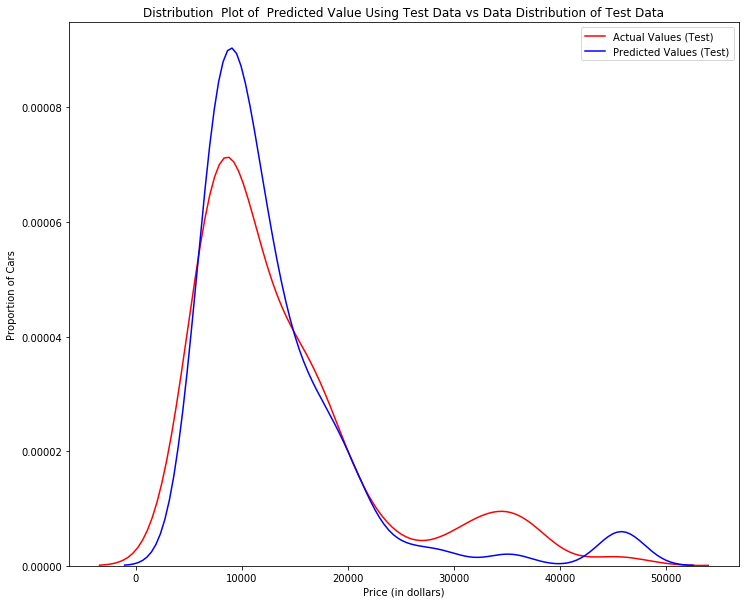

In [137]:
#Question 4e
yhat_test1 = poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [138]:
#Part 3: Ridge regression

In [139]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [140]:
from sklearn.linear_model import Ridge

In [153]:
RigeModel = Ridge(alpha = 0.1)
RigeModel.fit(x_train_pr, y_train)

/Users/yangfeilin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [154]:
yhat = RigeModel.predict(x_test_pr)

In [147]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [155]:
# Select the Alfa minimize the test error
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

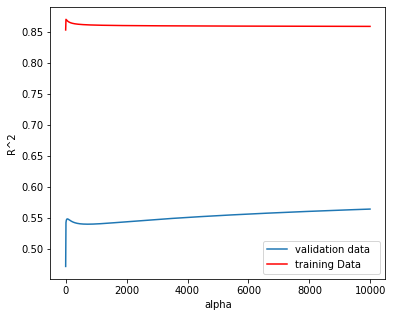

In [158]:
width = 6
height = 5
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [162]:
#Question5
RigeModel1 = Ridge(alpha = 10)
RigeModel1.fit(x_train_pr, y_train)
RigeModel1.score(x_test_pr, y_test)

0.5418576440207541

In [167]:
#Part4:Grid Search
from sklearn.model_selection import GridSearchCV
#GridSearchCV: make process of finding the best hyperparameter simpler

In [164]:
#create dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [165]:
#Create ridge regions object
RR = Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [168]:
#Create ridge grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [169]:
#Fit the model
Grid1.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)

/Users/yangfeilin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [170]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [171]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

In [172]:
#Question 6: 
#perform grid search for alpha parameter and normalization parameter, find best values of the parameters
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

/Users/yangfeilin/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)